In [ ]:
import shutil
shutil.unpack_archive("train.tar.xz", "/content/")

In [ ]:
import tensorflow as tf


In [ ]:
trainDir = "/content/train/"

In [ ]:
trainDataGen = tf.keras.preprocessing.image.ImageDataGenerator(
              rescale=1/255.,
              horizontal_flip=True,
              vertical_flip=True,
              rotation_range=90,
              width_shift_range=0.3,
              height_shift_range=0.3,
              brightness_range=(0.1, 0.9),
              zoom_range=[0.5, 1.5],
              fill_mode='reflect',
              channel_shift_range=150.0,
              validation_split = 0.2)

trainGen = trainDataGen.flow_from_directory(trainDir, target_size = (256, 256), class_mode="categorical", subset='training')
valGen = trainDataGen.flow_from_directory(trainDir, target_size = (256, 256), class_mode="categorical", subset='validation')


Found 448 images belonging to 7 classes.
Found 112 images belonging to 7 classes.


In [ ]:
noSamples = 448
bs = 32

In [ ]:
model.save("fin14.h5")

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(7, activation='softmax'))
# compile model
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(trainGen, epochs=150, steps_per_epoch=noSamples//bs,
                    validation_data = valGen, 
                    verbose = 1)
                    # validation_steps=2)


Epoch 1/150
14/14 [==============================] - 12s 823ms/step - loss: 1.9463 - accuracy: 0.1518 - val_loss: 1.9458 - val_accuracy: 0.1696
Epoch 2/150
14/14 [==============================] - 10s 739ms/step - loss: 1.9455 - accuracy: 0.1250 - val_loss: 1.9439 - val_accuracy: 0.1429
Epoch 3/150
14/14 [==============================] - 10s 739ms/step - loss: 1.9456 - accuracy: 0.1540 - val_loss: 1.9408 - val_accuracy: 0.2054
Epoch 4/150
14/14 [==============================] - 10s 733ms/step - loss: 1.9351 - accuracy: 0.1607 - val_loss: 1.9412 - val_accuracy: 0.1607
Epoch 5/150
14/14 [==============================] - 10s 732ms/step - loss: 1.9262 - accuracy: 0.1629 - val_loss: 1.9087 - val_accuracy: 0.2232
Epoch 6/150
14/14 [==============================] - 10s 729ms/step - loss: 1.9038 - accuracy: 0.2388 - val_loss: 1.9038 - val_accuracy: 0.1696
Epoch 7/150
14/14 [==============================] - 10s 732ms/step - loss: 1.8149 - accuracy: 0.2589 - val_loss: 1.8515 - val_accuracy:

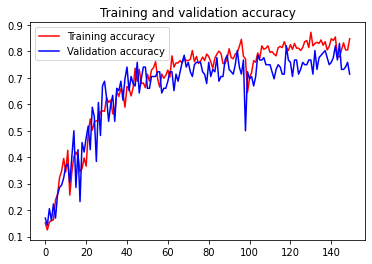

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
print(trainGen.class_indices)

{'basketball_court': 0, 'beach': 1, 'forest': 2, 'others': 3, 'railway': 4, 'swimming_pool': 5, 'tennis_court': 6}


In [ ]:
import numpy as np

def classes_order(f):
  if f == 0:
    return 1;
  elif f == 1:
    return 2;
  elif f == 2:
    return 3;
  elif f == 3:
    return 7;
  elif f == 4:
    return 4;
  elif f == 5:
    return 6;
  else:
    return 5;
  

path = "/content/test_set/1001.jpg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
classes = model.predict(x)
f = classes.argmax()
g = classes_order(f)
print(g)

5


In [ ]:
import os

directory = r'/content/test_set'
j = []
for entry in os.scandir(directory):
    j.append(entry.name)

In [ ]:
j

In [ ]:
j.sort()

In [ ]:
j

In [ ]:
for i in range(0, len(j)):
  path = "/content/test_set/" + j[i]
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  classes = model.predict(x)
  f = classes.argmax()
  g = classes_order(f)
  print(j[i].split(".")[0] + ", " + g)

1001,5
1002,7
1003,7
1004,7
1005,7
1006,5
1007,2
1008,7
1009,7
1010,6
1011,7
1012,2
1013,1
1014,7
1015,7
1016,4
1017,2
1018,6
1019,4
1020,7
1021,6
1022,7
1023,4
1024,7
1025,4
1026,5
1027,7
1028,7
1029,6
1030,7
1031,2
1032,6
1033,4
1034,6
1035,5
1036,1
1037,7
1038,7
1039,1
1040,7
1041,7
1042,7
1043,2
1044,4
1045,7
1046,2
1047,6
1048,5
1049,7
1050,6
1051,6
1052,2
1053,7
1054,7
1055,7
1056,4
1057,7
1058,1
1059,7
1060,4
1061,7
1062,4
1063,4
1064,2
1065,7
1066,7
1067,2
1068,6
1069,1
1070,7
1071,4
1072,4
1073,2
1074,4
1075,7
1076,7
1077,2
1078,6
1079,7
1080,7
1081,5
1082,2
1083,2
1084,4
1085,6
1086,5
1087,6
1088,4
1089,7
1090,7
1091,4
1092,6
1093,6
1094,1
1095,2
